In [2]:
!pip install numpy
!pip install pandas
!pip install pytz

In [13]:
import numpy as np
import pandas as pd
from datetime import datetime
import pytz

local_tz = pytz.timezone('Portugal')

In [21]:

test_data = pd.read_csv('datasets/test.csv')
print(test_data.head)


<bound method NDFrame.head of     TRIP_ID CALL_TYPE  ORIGIN_CALL  ORIGIN_STAND   TAXI_ID   TIMESTAMP  \
0        T1         B          NaN          15.0  20000542  1408039037   
1        T2         B          NaN          57.0  20000108  1408038611   
2        T3         B          NaN          15.0  20000370  1408038568   
3        T4         B          NaN          53.0  20000492  1408039090   
4        T5         B          NaN          18.0  20000621  1408039177   
5        T6         A      42612.0           NaN  20000607  1408037146   
6        T7         B          NaN          15.0  20000310  1408038846   
7        T8         A      31780.0           NaN  20000619  1408038948   
8        T9         B          NaN           9.0  20000503  1408038563   
9       T10         B          NaN          15.0  20000327  1408038021   
10      T11         B          NaN          56.0  20000664  1408038267   
11      T12         C          NaN           NaN  20000160  1408038946   
12      

In [5]:
train_data = pd.read_csv('datasets/train with actual day v3.csv')
# train_data.head()
train_data.groupby('MISSING_DATA').count()

,Unnamed: 0,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,POLYLINE,DATE,ACTUAL_DAYTYPE
MISSING_DATA,,,,,,,,,,,
False,1710660,1710660,1710660,364769,806576,1710660,1710660,1710660,1710660,1710660,1710660
True,10,10,10,1,3,10,10,10,10,10,10


In [6]:
holiday_data = pd.read_csv('datasets/Holidays.csv')
holiday_data.head()

,Date,Designation,Day of the week
0,01.01.2013,New Year's Day,Tu
1,12.02.2013,Shrove Tuesday,Tu
2,29.03.2013,Good Friday,Fr
3,31.03.2013,Easter,Su
4,31.03.2013,DST start,Su


In [7]:
train_data.groupby('ACTUAL_DAYTYPE').count()

,Unnamed: 0,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,DATE
ACTUAL_DAYTYPE,,,,,,,,,,,
A,1504024,1504024,1504024,324091,716815,1504024,1504024,1504024,1504024,1504024,1504024
B,105390,105390,105390,19187,43348,105390,105390,105390,105390,105390,105390
C,101256,101256,101256,21492,46416,101256,101256,101256,101256,101256,101256


In [22]:
#add datestamp to test data
datestamp_list = []


for index, row in test_data.iterrows():
    epoch_datestamp = row['TIMESTAMP']
    datetime_for_datestamp_in_utc = datetime.utcfromtimestamp(epoch_datestamp)
    actual_datetime_for_datestamp = datetime_for_datestamp_in_utc.replace(tzinfo=pytz.utc).astimezone(local_tz)
    datestamp_list.append(actual_datetime_for_datestamp)

test_data['DATE'] = datestamp_list

In [57]:
#add datestamp to train data
datestamp_list = []


for index, row in train_data.iterrows():
    epoch_datestamp = row['TIMESTAMP']
    datetime_for_datestamp_in_utc = datetime.utcfromtimestamp(epoch_datestamp)
    actual_datetime_for_datestamp = datetime_for_datestamp_in_utc.replace(tzinfo=pytz.utc).astimezone(local_tz)
    datestamp_list.append(actual_datetime_for_datestamp)

train_data['DATE'] = datestamp_list

In [29]:
test_data.to_csv('datasets/test with all info.csv')

In [23]:
holiday_date=[]
for index, row in holiday_data.iterrows():
        holiday_datestamp = row['Date']
        holiday_datestamp = holiday_datestamp.replace("\t", "")
        holiday_datetime = datetime.strptime(holiday_datestamp, '%d.%m.%Y')
        holiday_date.append(holiday_datetime)
holiday_data['DateStamp']=holiday_date
print(holiday_data.head)

<bound method NDFrame.head of           Date                Designation Day of the week  DateStamp
0   01.01.2013             New Year's Day              Tu 2013-01-01
1   12.02.2013             Shrove Tuesday              Tu 2013-02-12
2   29.03.2013                Good Friday              Fr 2013-03-29
3   31.03.2013                     Easter              Su 2013-03-31
4   31.03.2013                  DST start              Su 2013-03-31
5   25.04.2013       Freedom day Portugal              Th 2013-04-25
6   01.05.2013                 Labour Day              We 2013-05-01
7   05.05.2013               Mother's Day              Su 2013-05-05
8   09.05.2013                 Europe Day              Th 2013-05-09
9   30.05.2013             Corpus Christi              Th 2013-05-30
10  10.06.2013               Portugal Day              Mo 2013-06-10
11  15.08.2013             Assumption Day              Th 2013-08-15
12  05.10.2013      Republic Day Portugal              Sa 2013-10-05
13  

In [24]:
#for test data
actual_day_type = []
counter = 0
for index, row in test_data.iterrows():
    taxi_datetime= row['DATE']
    taxi_datetime = taxi_datetime.replace(tzinfo=None)
    flag=0
    for index, row in holiday_data.iterrows():
        holiday_datetime = row['DateStamp']
        delta = taxi_datetime.date() - holiday_datetime.date()
        actual_day_type_value='A'
        if(delta.days > 5):
            holiday_data.drop(index, inplace = True)
        if(delta.days==0):
            actual_day_type_value = 'B'
            break
        elif(delta.days==-1):
            actual_day_type_value = 'C'
            break
        elif(delta.days<=-2):
            break
    actual_day_type.append(actual_day_type_value)
    counter+=1
    if(counter%500==0):
        print(counter/1710670)
test_data['ACTUAL_DAYTYPE'] = actual_day_type
test_data.groupby('ACTUAL_DAYTYPE').count()        

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,DATE
ACTUAL_DAYTYPE,,,,,,,,,,
A,154,154,47,62,154,154,154,154,154,154
B,92,92,17,18,92,92,92,92,92,92
C,74,74,8,43,74,74,74,74,74,74


In [80]:
#for train data
actual_day_type = []
counter = 0
for index, row in train_data.iterrows():
    taxi_datetime= row['DATE']
    taxi_datetime = taxi_datetime.replace(tzinfo=None)
    flag=0
    for index, row in holiday_data.iterrows():
        holiday_datetime = row['DateStamp']
        delta = taxi_datetime.date() - holiday_datetime.date()
        actual_day_type_value='A'
        if(delta.days > 5):
            holiday_data.drop(index, inplace = True)
        if(delta.days==0):
            actual_day_type_value = 'B'
            break
        elif(delta.days==-1):
            actual_day_type_value = 'C'
            break
        elif(delta.days<=-2):
            break
    actual_day_type.append(actual_day_type_value)
    counter+=1
    if(counter%500==0):
        print(counter/1710670)
train_data['ACTUAL_DAYTYPE'] = actual_day_type
train_data.groupby('ACTUAL_DAYTYPE').count()        

0.0002922831405238883
0.0005845662810477766
0.0008768494215716649
0.0011691325620955533
0.0014614157026194416
0.0017536988431433298
0.002045981983667218
0.0023382651241911066
0.0026305482647149946
0.002922831405238883
0.003215114545762771
0.0035073976862866597
0.0037996808268105477
0.004091963967334436
0.004384247107858325
0.004676530248382213
0.004968813388906101
0.005261096529429989
0.005553379669953878
0.005845662810477766
0.006137945951001655
0.006430229091525542
0.006722512232049431
0.007014795372573319
0.007307078513097208
0.007599361653621095
0.007891644794144984
0.008183927934668872
0.00847621107519276
0.00876849421571665
0.009060777356240538
0.009353060496764426
0.009645343637288315
0.009937626777812202
0.01022990991833609
0.010522193058859979
0.010814476199383867
0.011106759339907755
0.011399042480431644
0.011691325620955532
0.011983608761479421
0.01227589190200331
0.012568175042527196
0.012860458183051085
0.013152741323574973
0.013445024464098862
0.01373730760462275
0.014029

0.12042065389584199
0.12071293703636587
0.12100522017688976
0.12129750331741365
0.12158978645793753
0.12188206959846141
0.1221743527389853
0.12246663587950919
0.12275891902003308
0.12305120216055697
0.12334348530108086
0.12363576844160475
0.12392805158212863
0.12422033472265252
0.12451261786317641
0.1248049010037003
0.1250971841442242
0.1253894672847481
0.12568175042527197
0.12597403356579587
0.12626631670631974
0.12655859984684364
0.12685088298736752
0.12714316612789142
0.1274354492684153
0.1277277324089392
0.12802001554946307
0.12831229868998698
0.12860458183051085
0.12889686497103475
0.12918914811155863
0.12948143125208253
0.1297737143926064
0.1300659975331303
0.13035828067365418
0.13065056381417808
0.13094284695470196
0.13123513009522586
0.13152741323574973
0.13181969637627364
0.1321119795167975
0.1324042626573214
0.1326965457978453
0.13298882893836916
0.13328111207889307
0.13357339521941694
0.13386567835994084
0.13415796150046472
0.13445024464098862
0.1347425277815125
0.1350348109

0.24201044035377953
0.2423027234943034
0.2425950066348273
0.24288728977535118
0.24317957291587505
0.24347185605639896
0.24376413919692283
0.24405642233744673
0.2443487054779706
0.2446409886184945
0.24493327175901838
0.2452255548995423
0.24551783804006616
0.24581012118059006
0.24610240432111394
0.24639468746163784
0.24668697060216171
0.24697925374268562
0.2472715368832095
0.2475638200237334
0.24785610316425727
0.24814838630478117
0.24844066944530505
0.24873295258582895
0.24902523572635282
0.24931751886687673
0.2496098020074006
0.2499020851479245
0.2501943682884484
0.25048665142897225
0.2507789345694962
0.25107121771002006
0.25136350085054393
0.2516557839910678
0.25194806713159174
0.2522403502721156
0.2525326334126395
0.25282491655316336
0.2531171996936873
0.25340948283421116
0.25370176597473504
0.2539940491152589
0.25428633225578284
0.2545786153963067
0.2548708985368306
0.25516318167735447
0.2554554648178784
0.25574774795840227
0.25604003109892615
0.25633231423945
0.25662459737997395
0.

0.3711995884653381
0.37149187160586206
0.37178415474638593
0.3720764378869098
0.3723687210274337
0.3726610041679576
0.3729532873084815
0.37324557044900536
0.37353785358952923
0.37383013673005316
0.37412241987057704
0.3744147030111009
0.3747069861516248
0.37499926929214866
0.3752915524326726
0.37558383557319647
0.37587611871372034
0.3761684018542442
0.37646068499476815
0.376752968135292
0.3770452512758159
0.37733753441633977
0.3776298175568637
0.3779221006973876
0.37821438383791145
0.3785066669784353
0.37879895011895925
0.37909123325948313
0.379383516400007
0.3796757995405309
0.3799680826810548
0.3802603658215787
0.38055264896210256
0.38084493210262643
0.38113721524315036
0.38142949838367424
0.3817217815241981
0.382014064664722
0.3823063478052459
0.3825986309457698
0.38289091408629367
0.38318319722681754
0.38347548036734147
0.38376776350786534
0.3840600466483892
0.3843523297889131
0.384644612929437
0.3849368960699609
0.3852291792104848
0.38552146235100865
0.3858137454915326
0.3861060286

0.49541992318799066
0.49571220632851454
0.49600448946903847
0.49629677260956234
0.4965890557500862
0.4968813388906101
0.497173622031134
0.4974659051716579
0.49775818831218177
0.49805047145270565
0.4983427545932296
0.49863503773375345
0.4989273208742773
0.4992196040148012
0.49951188715532513
0.499804170295849
0.5000964534363729
0.5003887365768968
0.5006810197174206
0.5009733028579445
0.5012655859984685
0.5015578691389924
0.5018501522795162
0.5021424354200401
0.502434718560564
0.5027270017010879
0.5030192848416117
0.5033115679821356
0.5036038511226596
0.5038961342631835
0.5041884174037073
0.5044807005442312
0.5047729836847551
0.505065266825279
0.5053575499658028
0.5056498331063267
0.5059421162468507
0.5062343993873746
0.5065266825278985
0.5068189656684223
0.5071112488089462
0.5074035319494701
0.507695815089994
0.5079880982305178
0.5082803813710417
0.5085726645115657
0.5088649476520896
0.5091572307926134
0.5094495139331373
0.5097417970736612
0.5100340802141851
0.5103263633547089
0.5106186

0.6246090712995493
0.6249013544400732
0.6251936375805971
0.625485920721121
0.6257782038616448
0.6260704870021687
0.6263627701426926
0.6266550532832165
0.6269473364237405
0.6272396195642643
0.6275319027047882
0.6278241858453121
0.628116468985836
0.6284087521263598
0.6287010352668837
0.6289933184074076
0.6292856015479316
0.6295778846884554
0.6298701678289793
0.6301624509695032
0.6304547341100271
0.6307470172505509
0.6310393003910748
0.6313315835315987
0.6316238666721227
0.6319161498126465
0.6322084329531704
0.6325007160936943
0.6327929992342182
0.633085282374742
0.6333775655152659
0.6336698486557898
0.6339621317963138
0.6342544149368377
0.6345466980773615
0.6348389812178854
0.6351312643584093
0.6354235474989332
0.635715830639457
0.6360081137799809
0.6363003969205049
0.6365926800610288
0.6368849632015526
0.6371772463420765
0.6374695294826004
0.6377618126231243
0.6380540957636481
0.638346378904172
0.638638662044696
0.6389309451852199
0.6392232283257437
0.6395155114662676
0.6398077946067915

0.7622744304863007
0.7625667136268246
0.7628589967673485
0.7631512799078723
0.7634435630483962
0.7637358461889201
0.764028129329444
0.764320412469968
0.7646126956104918
0.7649049787510157
0.7651972618915396
0.7654895450320635
0.7657818281725873
0.7660741113131112
0.7663663944536351
0.7666586775941591
0.7669509607346829
0.7672432438752068
0.7675355270157307
0.7678278101562546
0.7681200932967784
0.7684123764373023
0.7687046595778262
0.7689969427183502
0.769289225858874
0.7695815089993979
0.7698737921399218
0.7701660752804457
0.7704583584209695
0.7707506415614934
0.7710429247020173
0.7713352078425413
0.7716274909830652
0.771919774123589
0.7722120572641129
0.7725043404046368
0.7727966235451607
0.7730889066856845
0.7733811898262084
0.7736734729667323
0.7739657561072563
0.7742580392477801
0.774550322388304
0.7748426055288279
0.7751348886693518
0.7754271718098756
0.7757194549503995
0.7760117380909234
0.7763040212314474
0.7765963043719712
0.7768885875124951
0.777180870653019
0.7774731537935429

0.8987706571109565
0.8990629402514804
0.8993552233920044
0.8996475065325282
0.8999397896730521
0.900232072813576
0.9005243559540999
0.9008166390946237
0.9011089222351476
0.9014012053756715
0.9016934885161955
0.9019857716567193
0.9022780547972432
0.9025703379377671
0.902862621078291
0.9031549042188148
0.9034471873593387
0.9037394704998626
0.9040317536403866
0.9043240367809104
0.9046163199214343
0.9049086030619582
0.9052008862024821
0.9054931693430059
0.9057854524835298
0.9060777356240537
0.9063700187645776
0.9066623019051016
0.9069545850456254
0.9072468681861493
0.9075391513266732
0.907831434467197
0.9081237176077209
0.9084160007482448
0.9087082838887687
0.9090005670292927
0.9092928501698165
0.9095851333103404
0.9098774164508643
0.9101696995913882
0.910461982731912
0.9107542658724359
0.9110465490129598
0.9113388321534838
0.9116311152940076
0.9119233984345315
0.9122156815750554
0.9125079647155793
0.9128002478561031
0.913092530996627
0.9133848141371509
0.9136770972776749
0.913969380418198

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,DATE
ACTUAL_DAYTYPE,,,,,,,,,,
A,1504024,1504024,324091,716815,1504024,1504024,1504024,1504024,1504024,1504024
B,105390,105390,19187,43348,105390,105390,105390,105390,105390,105390
C,101256,101256,21492,46416,101256,101256,101256,101256,101256,101256


In [27]:
#for test data
import ast
import matplotlib.pyplot as plt

counter = 0
count_md = test_data['MISSING_DATA'].count()
trip_duration = []
end_time = []
origin = []
dest = []
for i in range(count_md):
    polyline = ast.literal_eval(test_data['POLYLINE'][i])
    dur = len(polyline)
    trip_duration.append(dur)
    end_epoch_datestamp = test_data['TIMESTAMP'][i] + dur 
    end_datetime_for_datestamp_in_utc = datetime.utcfromtimestamp(end_epoch_datestamp)
    actual_end_datetime_for_datestamp = end_datetime_for_datestamp_in_utc.replace(tzinfo=pytz.utc).astimezone(local_tz)
    end_time.append(actual_end_datetime_for_datestamp)
    poly_arr = polyline
    if(poly_arr==[]):
        origin.append("NULL")
        dest.append("NULL")
    else:
        origin.append(poly_arr[0])
        dest.append(poly_arr[-1])
    counter+=1
    if(counter%500==0):
        print(counter/1710670)
test_data['DURATION'] = trip_duration
test_data['END_TIME'] = end_time
test_data['ORIGIN'] = origin
test_data['DESTINATION'] = dest

In [37]:
#for train data
import ast
import matplotlib.pyplot as plt

counter = 0
count_md = train_data['MISSING_DATA'].count()
trip_duration = []
end_time = []
origin = []
dest = []
for i in range(count_md):
    try:
        polyline = ast.literal_eval(train_data['POLYLINE'][i])
        dur = len(polyline)
        trip_duration.append(dur)
        end_epoch_datestamp = train_data['TIMESTAMP'][i] + dur 
        end_datetime_for_datestamp_in_utc = datetime.utcfromtimestamp(end_epoch_datestamp)
        actual_end_datetime_for_datestamp = end_datetime_for_datestamp_in_utc.replace(tzinfo=pytz.utc).astimezone(local_tz)
        end_time.append(actual_end_datetime_for_datestamp)
        poly_arr = polyline
        if(poly_arr==[]):
            origin.append("NULL")
            dest.append("NULL")
        else:
            origin.append(poly_arr[0])
            dest.append(poly_arr[-1])
    except:
        trip_duration.append("NULL")
        end_time.append("NULL")
        origin.append("NULL")
        dest.append("NULL")
    counter+=1
    if(counter%500==0):
        print(counter/1710670)
train_data['DURATION'] = trip_duration
train_data['END_TIME'] = end_time
train_data['ORIGIN'] = origin
train_data['DESTINATION'] = dest

0.0002922831405238883
0.0005845662810477766
0.0008768494215716649
0.0011691325620955533
0.0014614157026194416
0.0017536988431433298
0.002045981983667218
0.0023382651241911066
0.0026305482647149946
0.002922831405238883
0.003215114545762771
0.0035073976862866597
0.0037996808268105477
0.004091963967334436
0.004384247107858325
0.004676530248382213
0.004968813388906101
0.005261096529429989
0.005553379669953878
0.005845662810477766
0.006137945951001655
0.006430229091525542
0.006722512232049431
0.007014795372573319
0.007307078513097208
0.007599361653621095
0.007891644794144984
0.008183927934668872
0.00847621107519276
0.00876849421571665
0.009060777356240538
0.009353060496764426
0.009645343637288315
0.009937626777812202
0.01022990991833609
0.010522193058859979
0.010814476199383867
0.011106759339907755
0.011399042480431644
0.011691325620955532
0.011983608761479421
0.01227589190200331
0.012568175042527196
0.012860458183051085
0.013152741323574973
0.013445024464098862
0.01373730760462275
0.014029

0.11895923819322254
0.11925152133374643
0.11954380447427032
0.11983608761479421
0.1201283707553181
0.12042065389584199
0.12071293703636587
0.12100522017688976
0.12129750331741365
0.12158978645793753
0.12188206959846141
0.1221743527389853
0.12246663587950919
0.12275891902003308
0.12305120216055697
0.12334348530108086
0.12363576844160475
0.12392805158212863
0.12422033472265252
0.12451261786317641
0.1248049010037003
0.1250971841442242
0.1253894672847481
0.12568175042527197
0.12597403356579587
0.12626631670631974
0.12655859984684364
0.12685088298736752
0.12714316612789142
0.1274354492684153
0.1277277324089392
0.12802001554946307
0.12831229868998698
0.12860458183051085
0.12889686497103475
0.12918914811155863
0.12948143125208253
0.1297737143926064
0.1300659975331303
0.13035828067365418
0.13065056381417808
0.13094284695470196
0.13123513009522586
0.13152741323574973
0.13181969637627364
0.1321119795167975
0.1324042626573214
0.1326965457978453
0.13298882893836916
0.13328111207889307
0.1335733952

0.24054902465116007
0.24084130779168397
0.24113359093220785
0.24142587407273175
0.24171815721325562
0.24201044035377953
0.2423027234943034
0.2425950066348273
0.24288728977535118
0.24317957291587505
0.24347185605639896
0.24376413919692283
0.24405642233744673
0.2443487054779706
0.2446409886184945
0.24493327175901838
0.2452255548995423
0.24551783804006616
0.24581012118059006
0.24610240432111394
0.24639468746163784
0.24668697060216171
0.24697925374268562
0.2472715368832095
0.2475638200237334
0.24785610316425727
0.24814838630478117
0.24844066944530505
0.24873295258582895
0.24902523572635282
0.24931751886687673
0.2496098020074006
0.2499020851479245
0.2501943682884484
0.25048665142897225
0.2507789345694962
0.25107121771002006
0.25136350085054393
0.2516557839910678
0.25194806713159174
0.2522403502721156
0.2525326334126395
0.25282491655316336
0.2531171996936873
0.25340948283421116
0.25370176597473504
0.2539940491152589
0.25428633225578284
0.2545786153963067
0.2548708985368306
0.2551631816773544

0.3641847930927648
0.36447707623328873
0.3647693593738126
0.3650616425143365
0.36535392565486036
0.3656462087953843
0.36593849193590816
0.36623077507643204
0.3665230582169559
0.36681534135747984
0.3671076244980037
0.3673999076385276
0.36769219077905146
0.3679844739195754
0.36827675706009927
0.36856904020062314
0.368861323341147
0.36915360648167095
0.3694458896221948
0.3697381727627187
0.37003045590324257
0.3703227390437665
0.3706150221842904
0.37090730532481425
0.3711995884653381
0.37149187160586206
0.37178415474638593
0.3720764378869098
0.3723687210274337
0.3726610041679576
0.3729532873084815
0.37324557044900536
0.37353785358952923
0.37383013673005316
0.37412241987057704
0.3744147030111009
0.3747069861516248
0.37499926929214866
0.3752915524326726
0.37558383557319647
0.37587611871372034
0.3761684018542442
0.37646068499476815
0.376752968135292
0.3770452512758159
0.37733753441633977
0.3776298175568637
0.3779221006973876
0.37821438383791145
0.3785066669784353
0.37879895011895925
0.3790912

0.4878205615343696
0.48811284467489346
0.48840512781541734
0.4886974109559412
0.48898969409646514
0.489281977236989
0.4895742603775129
0.48986654351803677
0.4901588266585607
0.4904511097990846
0.49074339293960845
0.4910356760801323
0.49132795922065625
0.4916202423611801
0.491912525501704
0.4922048086422279
0.4924970917827518
0.4927893749232757
0.49308165806379955
0.49337394120432343
0.49366622434484736
0.49395850748537123
0.4942507906258951
0.494543073766419
0.4948353569069429
0.4951276400474668
0.49541992318799066
0.49571220632851454
0.49600448946903847
0.49629677260956234
0.4965890557500862
0.4968813388906101
0.497173622031134
0.4974659051716579
0.49775818831218177
0.49805047145270565
0.4983427545932296
0.49863503773375345
0.4989273208742773
0.4992196040148012
0.49951188715532513
0.499804170295849
0.5000964534363729
0.5003887365768968
0.5006810197174206
0.5009733028579445
0.5012655859984685
0.5015578691389924
0.5018501522795162
0.5021424354200401
0.502434718560564
0.5027270017010879


0.614671444521737
0.614963727662261
0.6152560108027849
0.6155482939433088
0.6158405770838327
0.6161328602243565
0.6164251433648804
0.6167174265054043
0.6170097096459282
0.6173019927864521
0.617594275926976
0.6178865590674999
0.6181788422080238
0.6184711253485476
0.6187634084890715
0.6190556916295954
0.6193479747701193
0.6196402579106431
0.6199325410511671
0.620224824191691
0.6205171073322149
0.6208093904727388
0.6211016736132626
0.6213939567537865
0.6216862398943104
0.6219785230348343
0.6222708061753582
0.6225630893158821
0.622855372456406
0.6231476555969299
0.6234399387374537
0.6237322218779776
0.6240245050185015
0.6243167881590254
0.6246090712995493
0.6249013544400732
0.6251936375805971
0.625485920721121
0.6257782038616448
0.6260704870021687
0.6263627701426926
0.6266550532832165
0.6269473364237405
0.6272396195642643
0.6275319027047882
0.6278241858453121
0.628116468985836
0.6284087521263598
0.6287010352668837
0.6289933184074076
0.6292856015479316
0.6295778846884554
0.6298701678289793


0.7415223275091046
0.7418146106496285
0.7421068937901524
0.7423991769306763
0.7426914600712001
0.7429837432117241
0.743276026352248
0.7435683094927719
0.7438605926332957
0.7441528757738196
0.7444451589143435
0.7447374420548674
0.7450297251953912
0.7453220083359152
0.7456142914764391
0.745906574616963
0.7461988577574868
0.7464911408980107
0.7467834240385346
0.7470757071790585
0.7473679903195823
0.7476602734601063
0.7479525566006302
0.7482448397411541
0.748537122881678
0.7488294060222018
0.7491216891627257
0.7494139723032496
0.7497062554437735
0.7499985385842973
0.7502908217248213
0.7505831048653452
0.7508753880058691
0.7511676711463929
0.7514599542869168
0.7517522374274407
0.7520445205679646
0.7523368037084884
0.7526290868490124
0.7529213699895363
0.7532136531300602
0.753505936270584
0.7537982194111079
0.7540905025516318
0.7543827856921557
0.7546750688326795
0.7549673519732035
0.7552596351137274
0.7555519182542513
0.7558442013947752
0.756136484535299
0.7564287676758229
0.756721050816346

0.8686654936369961
0.86895777677752
0.8692500599180438
0.8695423430585677
0.8698346261990916
0.8701269093396155
0.8704191924801393
0.8707114756206632
0.8710037587611872
0.8712960419017111
0.8715883250422349
0.8718806081827588
0.8721728913232827
0.8724651744638066
0.8727574576043304
0.8730497407448543
0.8733420238853783
0.8736343070259022
0.873926590166426
0.8742188733069499
0.8745111564474738
0.8748034395879977
0.8750957227285215
0.8753880058690454
0.8756802890095694
0.8759725721500933
0.8762648552906172
0.876557138431141
0.8768494215716649
0.8771417047121888
0.8774339878527126
0.8777262709932365
0.8780185541337605
0.8783108372742844
0.8786031204148083
0.8788954035553321
0.879187686695856
0.8794799698363799
0.8797722529769038
0.8800645361174276
0.8803568192579516
0.8806491023984755
0.8809413855389994
0.8812336686795232
0.8815259518200471
0.881818234960571
0.8821105181010949
0.8824028012416187
0.8826950843821426
0.8829873675226666
0.8832796506631905
0.8835719338037143
0.8838642169442382

0.9955163766243635
0.9958086597648874
0.9961009429054113
0.9963932260459352
0.9966855091864592
0.996977792326983
0.9972700754675069
0.9975623586080308
0.9978546417485546
0.9981469248890785
0.9984392080296024
0.9987314911701263
0.9990237743106503
0.9993160574511741
0.999608340591698
0.9999006237322219


In [8]:
for index, row in train_data.iterrows():
    if(row['MISSING_DATA']== True):
        train_data.drop(index, inplace = True)

In [35]:
print(train_data['POLYLINE'][i])

KeyError: 105621

In [9]:
train_data.groupby('MISSING_DATA').count()

,Unnamed: 0,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,POLYLINE,DATE,ACTUAL_DAYTYPE
MISSING_DATA,,,,,,,,,,,
False,1710660,1710660,1710660,364769,806576,1710660,1710660,1710660,1710660,1710660,1710660


In [47]:
train_data.to_csv('datasets/train with duration origin etc v4.csv')

In [49]:
for index, row in train_data.iterrows():
    if(row['DURATION']== "NULL"):
        train_data.drop(index, inplace = True)

[(0, 0.025), (0, 200)]

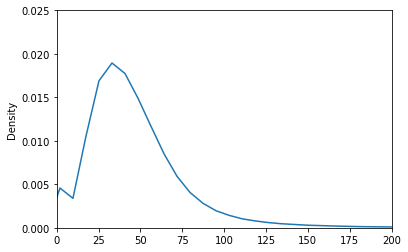

In [54]:
%matplotlib inline
train_data['DURATION'].plot.kde().set(xlim=(0,200), ylim=(0,0.025))
#train_data['DURATION'].plot.kde()